### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [78]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
%%writefile /content/descents.py
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np


@dataclass
class LearningRate:
    """
    Класс для вычисления длины шага.

    Parameters
    ----------
    lambda_ : float, optional
        Начальная скорость обучения. По умолчанию 1e-3.
    s0 : float, optional
        Параметр для вычисления скорости обучения. По умолчанию 1.
    p : float, optional
        Степенной параметр для вычисления скорости обучения. По умолчанию 0.5.
    iteration : int, optional
        Текущая итерация. По умолчанию 0.

    Methods
    -------
    __call__()
        Вычисляет скорость обучения на текущей итерации.
    """
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self):
        """
        Вычисляет скорость обучения по формуле lambda * (s0 / (s0 + t))^p.

        Returns
        -------
        float
            Скорость обучения на текущем шаге.
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    """
    Перечисление для выбора функции потерь.

    Attributes
    ----------
    MSE : auto
        Среднеквадратическая ошибка.
    MAE : auto
        Средняя абсолютная ошибка.
    LogCosh : auto
        Логарифм гиперболического косинуса от ошибки.
    Huber : auto
        Функция потерь Хьюбера.
    """
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()


class BaseDescent:
    """
    Базовый класс для всех методов градиентного спуска.

    Parameters
    ----------
    dimension : int
        Размерность пространства признаков.
    lambda_ : float, optional
        Параметр скорости обучения. По умолчанию 1e-3.
    loss_function : LossFunction, optional
        Функция потерь, которая будет оптимизироваться. По умолчанию MSE.

    Attributes
    ----------
    w : np.ndarray
        Вектор весов модели.
    lr : LearningRate
        Скорость обучения.
    loss_function : LossFunction
        Функция потерь.

    Methods
    -------
    step(x: np.ndarray, y: np.ndarray) -> np.ndarray
        Шаг градиентного спуска.
    update_weights(gradient: np.ndarray) -> np.ndarray
        Обновление весов на основе градиента. Метод шаблон.
    calc_gradient(x: np.ndarray, y: np.ndarray) -> np.ndarray
        Вычисление градиента функции потерь по весам. Метод шаблон.
    calc_loss(x: np.ndarray, y: np.ndarray) -> float
        Вычисление значения функции потерь.
    predict(x: np.ndarray) -> np.ndarray
        Вычисление прогнозов на основе признаков x.
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        Инициализация базового класса для градиентного спуска.

        Parameters
        ----------
        dimension : int
            Размерность пространства признаков.
        lambda_ : float
            Параметр скорости обучения.
        loss_function : LossFunction
            Функция потерь, которая будет оптимизирована.

        Attributes
        ----------
        w : np.ndarray
            Начальный вектор весов, инициализированный случайным образом.
        lr : LearningRate
            Экземпляр класса для вычисления скорости обучения.
        loss_function : LossFunction
            Выбранная функция потерь.
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Выполнение одного шага градиентного спуска.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        np.ndarray
            Разность между текущими и обновленными весами.
        """

        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Шаблон функции для обновления весов. Должен быть переопределен в подклассах.

        Parameters
        ----------
        gradient : np.ndarray
            Градиент функции потерь по весам.

        Returns
        -------
        np.ndarray
            Разность между текущими и обновленными весами. Этот метод должен быть реализован в подклассах.
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Шаблон функции для вычисления градиента функции потерь по весам. Должен быть переопределен в подклассах.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        np.ndarray
            Градиент функции потерь по весам. Этот метод должен быть реализован в подклассах.
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Вычисление значения функции потерь с использованием текущих весов.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        float
            Значение функции потерь.
        """
        y_pred = x @ self.w
        residuals = y - y_pred
        mse = (residuals.T @ residuals) / x.shape[0]
        return mse.item()
        raise NotImplementedError('BaseDescent calc_loss function not implemented')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Расчет прогнозов на основе признаков x.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.

        Returns
        -------
        np.ndarray
            Прогнозируемые значения.
        """
        return x @ self.w
        raise NotImplementedError('BaseDescent predict function not implemented')


class VanillaGradientDescent(BaseDescent):
    """
    Класс полного градиентного спуска.

    Методы
    -------
    update_weights(gradient: np.ndarray) -> np.ndarray
        Обновление весов с учетом градиента.
    calc_gradient(x: np.ndarray, y: np.ndarray) -> np.ndarray
        Вычисление градиента функции потерь по весам.
    """

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Обновление весов на основе градиента.

        Parameters
        ----------
        gradient : np.ndarray
            Градиент функции потерь по весам.

        Returns
        -------
        np.ndarray
            Разность весов (w_{k + 1} - w_k).
        """
        eta = self.lr()
        delta_w = -eta * gradient
        self.w += delta_w
        return delta_w
        raise NotImplementedError('VanillaGradientDescent update_weights function not implemented')

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Вычисление градиента функции потерь по весам.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        np.ndarray
            Градиент функции потерь по весам.
        """
        n_samples = x.shape[0]
        gradient = (2 / n_samples) * (x.T @ x @ self.w - x.T @ y)
        return gradient
        raise NotImplementedError('VanillaGradientDescent calc_gradient function not implemented')


class StochasticDescent(VanillaGradientDescent):
    """
    Класс стохастического градиентного спуска.

    Parameters
    ----------
    batch_size : int, optional
        Размер мини-пакета. По умолчанию 50.

    Attributes
    ----------
    batch_size : int
        Размер мини-пакета.

    Методы
    -------
    calc_gradient(x: np.ndarray, y: np.ndarray) -> np.ndarray
        Вычисление градиента функции потерь по мини-пакетам.
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE):

        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Вычисление градиента функции потерь по мини-пакетам.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        np.ndarray
            Градиент функции потерь по весам, вычисленный по мини-пакету.
        """
        batch_indices = np.random.randint(0, x.shape[0], size=self.batch_size)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]
        n_samples = x_batch.shape[0]
        gradient = (2 / n_samples) * (x_batch.T @ x_batch @ self.w - x_batch.T @ y_batch)
        return gradient
        raise NotImplementedError('StochasticDescent calc_gradient function not implemented')


class MomentumDescent(VanillaGradientDescent):
    """
    Класс градиентного спуска с моментом.

    Параметры
    ----------
    dimension : int
        Размерность пространства признаков.
    lambda_ : float
        Параметр скорости обучения.
    loss_function : LossFunction
        Оптимизируемая функция потерь.

    Атрибуты
    ----------
    alpha : float
        Коэффициент момента.
    h : np.ndarray
        Вектор момента для весов.

    Методы
    -------
    update_weights(gradient: np.ndarray) -> np.ndarray
        Обновление весов с использованием момента.
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        Инициализация класса градиентного спуска с моментом.

        Parameters
        ----------
        dimension : int
            Размерность пространства признаков.
        lambda_ : float
            Параметр скорости обучения.
        loss_function : LossFunction
            Оптимизируемая функция потерь.
        """
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9

        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Обновление весов с использованием момента.

        Parameters
        ----------
        gradient : np.ndarray
            Градиент функции потерь.

        Returns
        -------
        np.ndarray
            Разность весов (w_{k + 1} - w_k).
        """
        eta = self.lr()
        self.h = self.alpha * self.h + eta * gradient
        delta_w = -self.h
        self.w += delta_w
        return delta_w


class Adam(VanillaGradientDescent):
    """
    Класс градиентного спуска с адаптивной оценкой моментов (Adam).

    Параметры
    ----------
    dimension : int
        Размерность пространства признаков.
    lambda_ : float
        Параметр скорости обучения.
    loss_function : LossFunction
        Оптимизируемая функция потерь.

    Атрибуты
    ----------
    eps : float
        Малая добавка для предотвращения деления на ноль.
    m : np.ndarray
        Векторы первого момента.
    v : np.ndarray
        Векторы второго момента.
    beta_1 : float
        Коэффициент распада для первого момента.
    beta_2 : float
        Коэффициент распада для второго момента.
    iteration : int
        Счетчик итераций.

    Методы
    -------
    update_weights(gradient: np.ndarray) -> np.ndarray
        Обновление весов с использованием адаптивной оценки моментов.
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        Инициализация класса Adam.

        Parameters
        ----------
        dimension : int
            Размерность пространства признаков.
        lambda_ : float
            Параметр скорости обучения.
        loss_function : LossFunction
            Оптимизируемая функция потерь.
        """
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Обновление весов с использованием адаптивной оценки моментов.

        Parameters
        ----------
        gradient : np.ndarray
            Градиент функции потерь.

        Returns
        -------
        np.ndarray
            Разность весов (w_{k + 1} - w_k).
        """
        self.iteration += 1
        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * (gradient ** 2)
        m_hat = self.m / (1 - self.beta_1 ** self.iteration)
        v_hat = self.v / (1 - self.beta_2 ** self.iteration)
        eta = self.lr()
        delta_w = -eta * m_hat / (np.sqrt(v_hat) + self.eps)
        self.w += delta_w
        return delta_w
        raise NotImplementedError('Adagrad update_weights function not implemented')


class BaseDescentReg(BaseDescent):
    """
    Базовый класс для градиентного спуска с регуляризацией.

    Параметры
    ----------
    *args : tuple
        Аргументы, передаваемые в базовый класс.
    mu : float, optional
        Коэффициент регуляризации. По умолчанию равен 0.
    **kwargs : dict
        Ключевые аргументы, передаваемые в базовый класс.

    Атрибуты
    ----------
    mu : float
        Коэффициент регуляризации.

    Методы
    -------
    calc_gradient(x: np.ndarray, y: np.ndarray) -> np.ndarray
        Вычисление градиента функции потерь с учетом L2 регуляризации по весам.
    """

    def __init__(self, *args, mu: float = 0, **kwargs):
        """
        Инициализация базового класса для градиентного спуска с регуляризацией.
        """
        super().__init__(*args, **kwargs)

        self.mu = mu

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Вычисление градиента функции потерь и L2 регуляризации по весам.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        np.ndarray
            Градиент функции потерь с учетом L2 регуляризации по весам.
        """
        l2_gradient: np.ndarray = np.zeros_like(x.shape[1])

        return super().calc_gradient(x, y) + l2_gradient * self.mu


class VanillaGradientDescentReg(BaseDescentReg, VanillaGradientDescent):
    """
    Класс полного градиентного спуска с регуляризацией.
    """


class StochasticDescentReg(BaseDescentReg, StochasticDescent):
    """
    Класс стохастического градиентного спуска с регуляризацией.
    """


class MomentumDescentReg(BaseDescentReg, MomentumDescent):
    """
    Класс градиентного спуска с моментом и регуляризацией.
    """


class AdamReg(BaseDescentReg, Adam):
    """
    Класс адаптивного градиентного алгоритма с регуляризацией (AdamReg).
    """


def get_descent(descent_config: dict) -> BaseDescent:
    """
    Создает экземпляр класса градиентного спуска на основе предоставленной конфигурации.

    Параметры
    ----------
    descent_config : dict
        Словарь конфигурации для выбора и настройки класса градиентного спуска. Должен содержать ключи:
        - 'descent_name': строка, название метода спуска ('full', 'stochastic', 'momentum', 'adam').
        - 'regularized': булево значение, указывает на необходимость использования регуляризации.
        - 'kwargs': словарь дополнительных аргументов, передаваемых в конструктор класса спуска.

    Возвращает
    -------
    BaseDescent
        Экземпляр класса, реализующего выбранный метод градиентного спуска.

    Исключения
    ----------
    ValueError
        Вызывается, если указано неправильное имя метода спуска.

    Примеры
    --------
    >>> descent_config = {
    ...     'descent_name': 'full',
    ...     'regularized': True,
    ...     'kwargs': {'dimension': 10, 'lambda_': 0.01, 'mu': 0.1}
    ... }
    >>> descent = get_descent(descent_config)
    >>> isinstance(descent, BaseDescent)
    True
    """
    descent_name = descent_config.get('descent_name', 'full')
    regularized = descent_config.get('regularized', False)

    descent_mapping: Dict[str, Type[BaseDescent]] = {
        'full': VanillaGradientDescent if not regularized else VanillaGradientDescentReg,
        'stochastic': StochasticDescent if not regularized else StochasticDescentReg,
        'momentum': MomentumDescent if not regularized else MomentumDescentReg,
        'adam': Adam if not regularized else AdamReg
    }

    if descent_name not in descent_mapping:
        raise ValueError(f'Incorrect descent name, use one of these: {descent_mapping.keys()}')

    descent_class = descent_mapping[descent_name]

    return descent_class(**descent_config.get('kwargs', {}))

Overwriting /content/descents.py


In [80]:
%%writefile /content/linear_regression.py
from __future__ import annotations

from typing import List

import numpy as np

from descents import BaseDescent
from descents import get_descent


class LinearRegression:
    """
    Класс линейной регрессии.

    Parameters
    ----------
    descent_config : dict
        Конфигурация градиентного спуска.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Критерий остановки по количеству итераций. По умолчанию равен 300.

    Attributes
    ----------
    descent : BaseDescent
        Экземпляр класса, реализующего градиентный спуск.
    tolerance : float
        Критерий остановки для квадрата евклидова нормы разности весов.
    max_iter : int
        Критерий остановки по количеству итераций.
    loss_history : List[float]
        История значений функции потерь на каждой итерации.

    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)

        self.tolerance: float = tolerance
        self.max_iter: int = max_iter

        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Обучение модели линейной регрессии, подбор весов для наборов данных x и y.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        self : LinearRegression
            Возвращает экземпляр класса с обученными весами.

        """
        # TODO: реализовать подбор весов для x и y
        self.loss_history = [self.descent.calc_loss(x, y)]
        for _ in range(self.max_iter):
            delta_w = self.descent.step(x, y)
            if np.any(np.isnan(self.descent.w)):
                break
            if np.linalg.norm(delta_w) ** 2 < self.tolerance:
                break
            self.loss_history.append(self.descent.calc_loss(x, y))
        return self
        raise NotImplementedError('Функция fit класса LinearRegression не реализована')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Прогнозирование целевых переменных для набора данных x.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.

        Returns
        -------
        prediction : np.ndarray
            Массив прогнозируемых значений.
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Расчёт значения функции потерь для наборов данных x и y.

        Parameters
        ----------
        x : np.ndarray
            Массив признаков.
        y : np.ndarray
            Массив целевых переменных.

        Returns
        -------
        loss : float
            Значение функции потерь.
        """
        return self.descent.calc_loss(x, y)

Overwriting /content/linear_regression.py


In [81]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [82]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [83]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [84]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [86]:
data = pd.read_csv('autos.csv')

In [87]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [88]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (EDA)

In [89]:
data['bias'] = 1
other += ['bias']
x = data[categorical + numeric + other]
y = data['price']

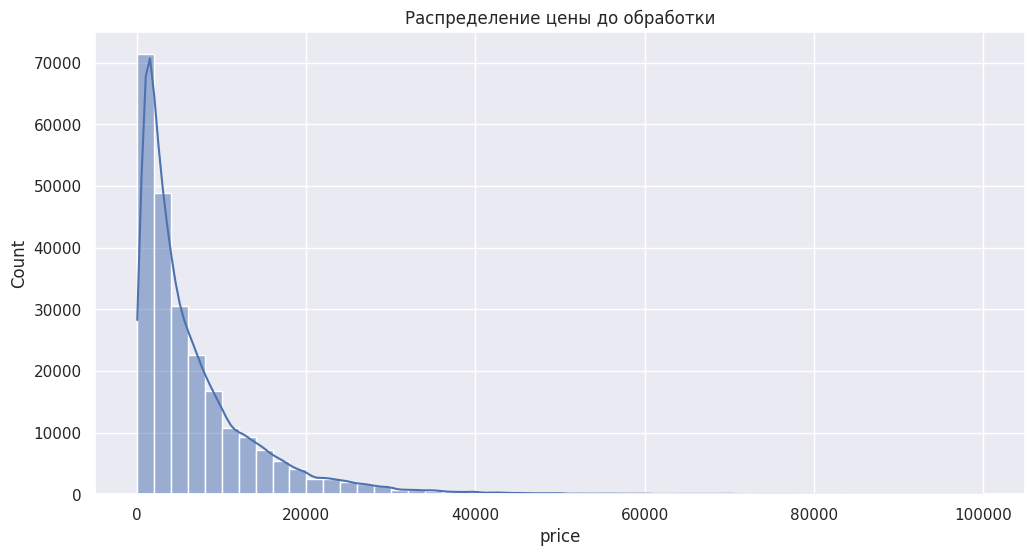

In [90]:
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], kde=True, bins=50)
plt.title("Распределение цены до обработки")
plt.show()

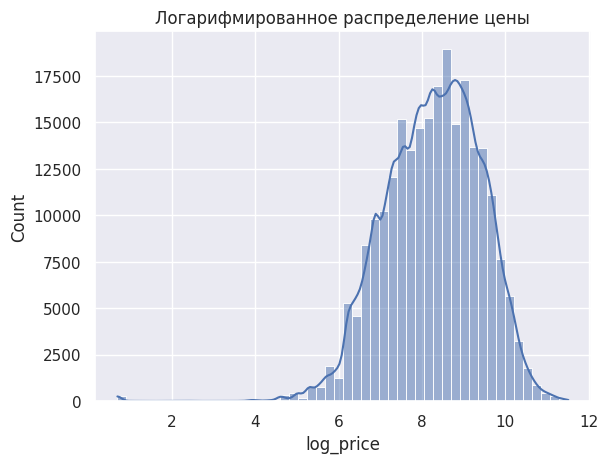

In [91]:
data['log_price'] = np.log1p(data['price'])
sns.histplot(data['log_price'], kde=True, bins=50)
plt.title("Логарифмированное распределение цены")
plt.show()

In [92]:
print(data.head())

        brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  bias  log_price  
0       75     150000            177   1500     1   7.313887  
1       69      90000             93   3600     1   8.188967  
2      102     150000            246    650     1   6.478510  
3      109     150000            140   2200     1   7.696667  
4      105     150000            136   2000     1   7.601402  


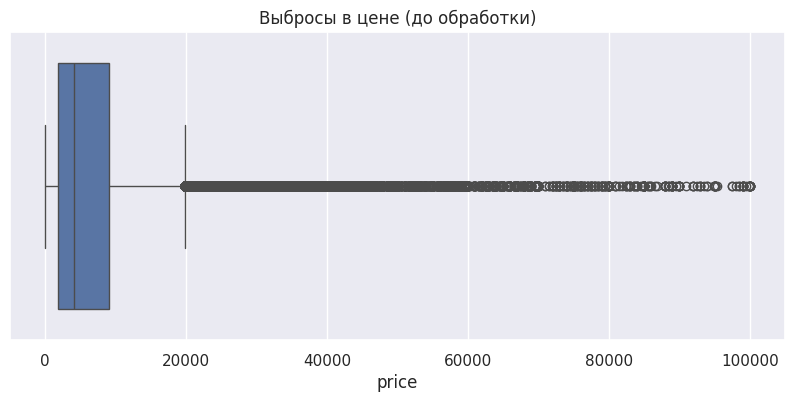

In [93]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['price'])
plt.title("Выбросы в цене (до обработки)")
plt.show()

In [94]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_clean = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

In [95]:
print(data_clean.dtypes)

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
bias                   int64
log_price            float64
dtype: object


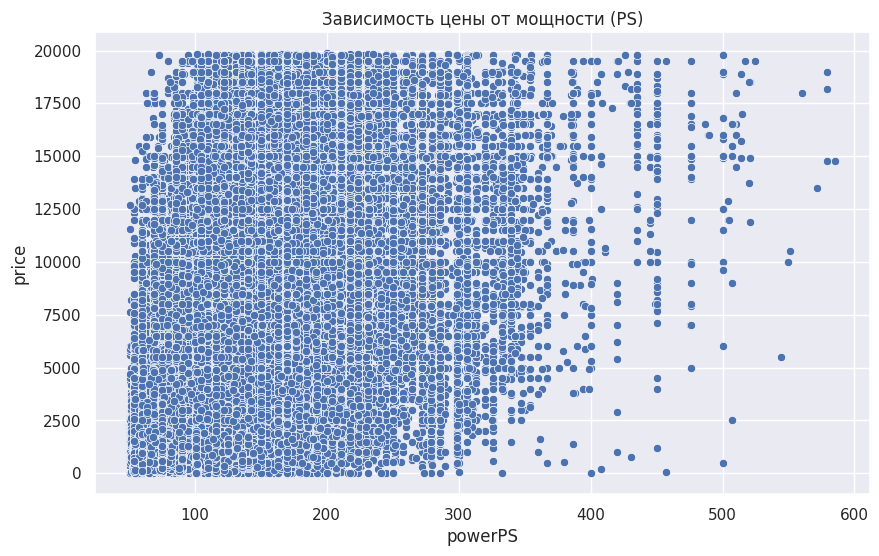

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='powerPS', y='price', data=data_clean)
plt.title("Зависимость цены от мощности (PS)")
plt.show()

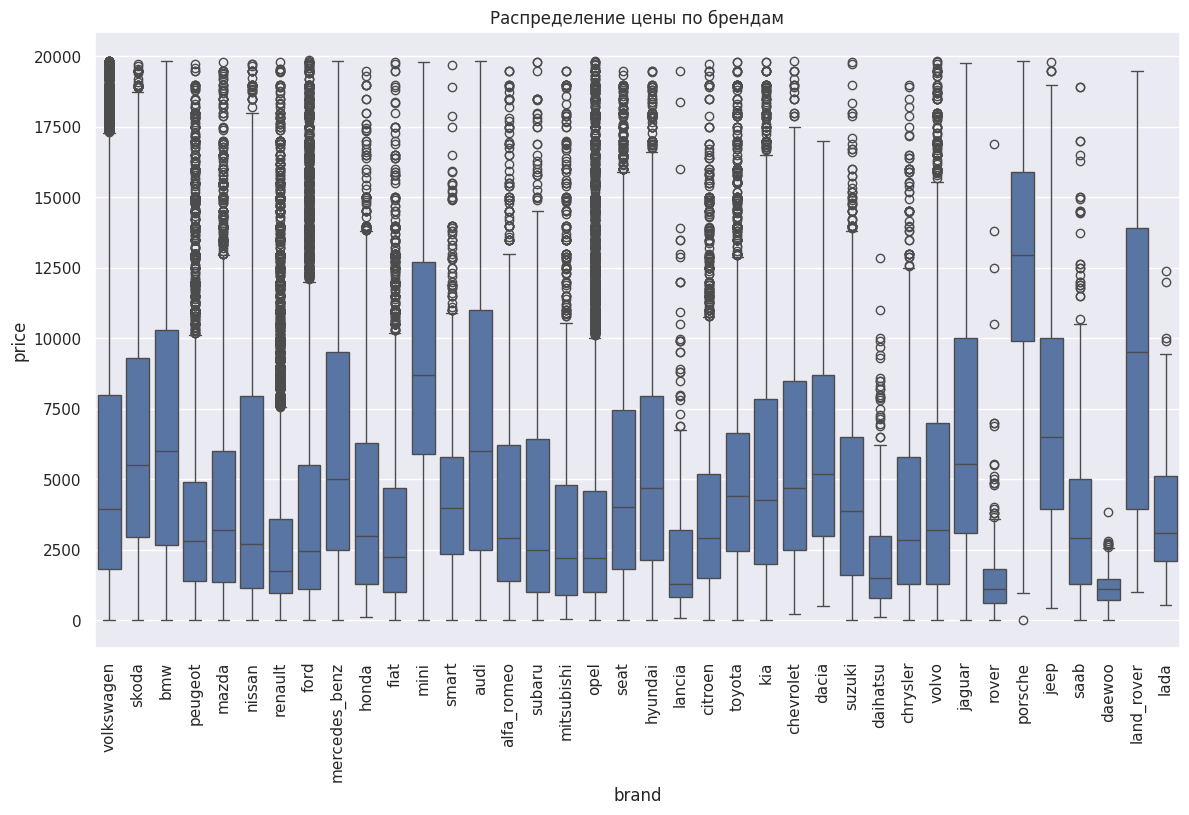

In [97]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='brand', y='price', data=data_clean)
plt.xticks(rotation=90)
plt.title("Распределение цены по брендам")
plt.show()

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x_transformed = column_transformer.fit_transform(x)

In [99]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test = train_test_split(x_transformed, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.111, random_state=42)

In [100]:
print("Размеры выборок:")
print(f"Обучающая: {x_train.shape}, Валидационная: {x_val.shape}, Тестовая: {x_test.shape}")

Размеры выборок:
Обучающая: (192976, 310), Валидационная: (24095, 310), Тестовая: (24119, 310)


In [101]:
print(data_clean.isnull().sum())

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
bias                 0
log_price            0
dtype: int64


<Axes: >

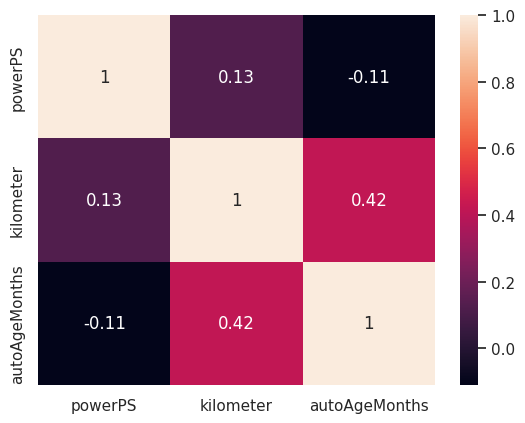

In [102]:
sns.heatmap(data_clean[numeric].corr(), annot=True)

## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [108]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
lambdas = np.logspace(-4, 1, 20)

In [109]:
from sklearn.metrics import r2_score
from linear_regression import LinearRegression

In [118]:
# Проверка типа x_train перед преобразованием
print(f"Тип x_train до преобразования: {type(x_train)}")
print(f"Форма x_train до преобразования: {x_train.shape}")

# Преобразуем разреженную матрицу в плотную, если x_train является CSR-матрицей
if hasattr(x_train, 'toarray'):
    x_train = x_train.toarray()

# Проверяем, что преобразование прошло успешно
print(f"Тип x_train после преобразования: {type(x_train)}")
print(f"Форма x_train после преобразования: {x_train.shape}")

# Теперь продолжаем обработку, если x_train является массивом NumPy
if isinstance(x_train, np.ndarray):
    if len(x_train.shape) == 1:
        n_samples = x_train.shape[0]
        n_features = 1
    elif len(x_train.shape) == 2:
        n_samples, n_features = x_train.shape
    else:
        raise ValueError("x_train должен быть массивом NumPy с хотя бы одной размерностью")
else:
    raise ValueError("x_train должен быть массивом NumPy")

# Выводим информацию для отладки
print(f"n_samples: {n_samples}, n_features: {n_features}")

# Далее используем n_features для передачи в конфигурацию
results = []
for lambda_ in lambdas:
    descent_config = {
        'descent_name': 'adam',
        'regularized': False,
        'kwargs': {'dimension': n_features, 'lambda_': lambda_}
    }
    model = LinearRegression(descent_config)
    model.fit(x_train, y_train)
    train_loss = model.calc_loss(x_train, y_train)
    val_loss = model.calc_loss(x_val, y_val)
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    results.append((lambda_, train_loss, val_loss, train_r2, val_r2))

# Преобразуем результаты в массив для удобства работы
results = np.array(results)

Тип x_train до преобразования: <class 'numpy.ndarray'>
Форма x_train до преобразования: ()
Тип x_train после преобразования: <class 'numpy.ndarray'>
Форма x_train после преобразования: ()


ValueError: x_train должен быть массивом NumPy с хотя бы одной размерностью

In [119]:
# Проверка содержимого и формы x_train до разделения
print(f"Содержимое x_train до разделения: {x_train}")
print(f"Форма x_train до разделения: {x_train.shape}")

# Если x_train пустой, проверяем процесс его загрузки
if x_train.size == 0:
    raise ValueError("x_train пустой. Проверьте, что данные корректно загружены и разделены.")

# Дальше преобразуем разреженные матрицы, если это необходимо
if hasattr(x_train, 'toarray'):
    x_train = x_train.toarray()

# Проверка после преобразования
print(f"Содержимое x_train после преобразования: {x_train}")
print(f"Форма x_train после преобразования: {x_train.shape}")

Содержимое x_train до разделения: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1929760 stored elements and shape (192976, 310)>
  Coords	Values
  (0, 20)	1.0
  (0, 134)	1.0
  (0, 292)	1.0
  (0, 295)	1.0
  (0, 298)	1.0
  (0, 305)	1.0
  (0, 306)	2.321388939137131
  (0, 307)	0.658700489302054
  (0, 308)	-0.37991170909866756
  (0, 309)	1.0
  (1, 30)	1.0
  (1, 159)	1.0
  (1, 291)	1.0
  (1, 296)	1.0
  (1, 300)	1.0
  (1, 305)	1.0
  (1, 306)	0.1934656975804213
  (1, 307)	0.658700489302054
  (1, 308)	-1.1187021426938457
  (1, 309)	1.0
  (2, 1)	1.0
  (2, 77)	1.0
  (2, 293)	1.0
  (2, 296)	1.0
  (2, 298)	1.0
  :	:
  (192973, 305)	1.0
  (192973, 306)	-0.2519135855360993
  (192973, 307)	0.03096786517452564
  (192973, 308)	-0.8313947518512764
  (192973, 309)	1.0
  (192974, 25)	1.0
  (192974, 46)	1.0
  (192974, 292)	1.0
  (192974, 296)	1.0
  (192974, 300)	1.0
  (192974, 305)	1.0
  (192974, 306)	-1.043698977743247
  (192974, 307)	0.658700489302054
  (192974, 308)	-0.10628562258193491
 

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [ ]:
batch_sizes = np.arange(5, 500, 10)

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ